In [1]:
# pip install lxml 

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
response = requests.get("https://www.worldometers.info/coronavirus/").text

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"
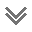

In [4]:
soup = BeautifulSoup(response)
soup

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
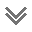

In [5]:
print(soup.prettify())

In [6]:
table= soup.find(id="main_table_countries_today")
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [7]:
table.find_all('tr')

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>


In [8]:
for row in table.find_all('tr'):
    data = row.find_all('td')
    print(data)
    

[]
[<td></td>, <td style="text-align:left;">
<nobr>North America</nobr>
</td>, <td>113,331,720</td>, <td>+1,235</td>, <td>1,517,864</td>, <td>+12</td>, <td>106,750,802</td>, <td>+13,986</td>, <td>5,063,054</td>, <td>9,653</td>, <td></td>, <td></td>, <td></td>, <td></td>, <td></td>, <td data-continent="North America" style="display:none;">North America</td>, <td>
</td>, <td></td>, <td></td>, <td></td>, <td></td>, <td></td>]
[<td></td>, <td style="text-align:left;">
<nobr>Asia</nobr>
</td>, <td>180,605,952</td>, <td>+390,369</td>, <td>1,461,447</td>, <td>+513</td>, <td>171,772,583</td>, <td>+372,826</td>, <td>7,371,922</td>, <td>13,075</td>, <td></td>, <td></td>, <td></td>, <td></td>, <td></td>, <td data-continent="Asia" style="display:none;">Asia</td>, <td>
</td>, <td></td>, <td></td>, <td></td>, <td></td>, <td></td>]
[<td></td>, <td style="text-align:left;">
<nobr>Europe</nobr>
</td>, <td>220,105,927</td>, <td>+103,224</td>, <td>1,896,262</td>, <td>+350</td>, <td>213,299,125</td>, <td>

[<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">220</td>, <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/montserrat/">Montserrat</a></td>, <td style="font-weight: bold; text-align:right">1,106</td>, <td style="font-weight: bold; text-align:right;"></td>, <td style="font-weight: bold; text-align:right;">8 </td>, <td style="font-weight: bold; 
                                    text-align:right;"></td>, <td style="font-weight: bold; text-align:right">1,067</td>, <td style="font-weight: bold; text-align:right;"></td>, <td style="text-align:right;font-weight:bold;">31</td>, <td style="font-weight: bold; text-align:right"></td>, <td style="font-weight: bold; text-align:right">221,289</td>, <td style="font-weight: bold; text-align:right">1,601</td>, <td style="font-weight: bold; text-align:right">15,598</td>, <td style="font-weight: bold; text-align:right">3,120,848</td>, <td style="font-weight: bold; text-align

In [9]:
result= {}
for row in table.find_all('tr'):
#     print(row)
    data = row.find_all('td')
    print(data,"+++++++++++++++++")
    for i in range(2, len(data),1):
        result[data[i - 1].text] = data[i].text
        

[] +++++++++++++++++
[<td></td>, <td style="text-align:left;">
<nobr>North America</nobr>
</td>, <td>113,331,720</td>, <td>+1,235</td>, <td>1,517,864</td>, <td>+12</td>, <td>106,750,802</td>, <td>+13,986</td>, <td>5,063,054</td>, <td>9,653</td>, <td></td>, <td></td>, <td></td>, <td></td>, <td></td>, <td data-continent="North America" style="display:none;">North America</td>, <td>
</td>, <td></td>, <td></td>, <td></td>, <td></td>, <td></td>] +++++++++++++++++
[<td></td>, <td style="text-align:left;">
<nobr>Asia</nobr>
</td>, <td>180,605,952</td>, <td>+390,369</td>, <td>1,461,447</td>, <td>+513</td>, <td>171,772,583</td>, <td>+372,826</td>, <td>7,371,922</td>, <td>13,075</td>, <td></td>, <td></td>, <td></td>, <td></td>, <td></td>, <td data-continent="Asia" style="display:none;">Asia</td>, <td>
</td>, <td></td>, <td></td>, <td></td>, <td></td>, <td></td>] +++++++++++++++++
[<td></td>, <td style="text-align:left;">
<nobr>Europe</nobr>
</td>, <td>220,105,927</td>, <td>+103,224</td>, <td>1,8

[<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">59</td>, <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/croatia/">Croatia</a></td>, <td style="font-weight: bold; text-align:right">1,206,633</td>, <td style="font-weight: bold; text-align:right;"></td>, <td style="font-weight: bold; text-align:right;">16,579 </td>, <td style="font-weight: bold; 
                                    text-align:right;"></td>, <td style="font-weight: bold; text-align:right">1,184,517</td>, <td style="font-weight: bold; text-align:right;"></td>, <td style="text-align:right;font-weight:bold;">5,537</td>, <td style="font-weight: bold; text-align:right">28</td>, <td style="font-weight: bold; text-align:right">297,842</td>, <td style="font-weight: bold; text-align:right">4,092</td>, <td style="font-weight: bold; text-align:right">5,111,776</td>, <td style="font-weight: bold; text-align:right">1,261,777</td>, <td style="font-weight: bo

[<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">72</td>, <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/uruguay/">Uruguay</a></td>, <td style="font-weight: bold; text-align:right">977,305</td>, <td style="font-weight: bold; text-align:right;"></td>, <td style="font-weight: bold; text-align:right;">7,438 </td>, <td style="font-weight: bold; 
                                    text-align:right;"></td>, <td style="font-weight: bold; text-align:right">968,169</td>, <td style="font-weight: bold; text-align:right;"></td>, <td style="text-align:right;font-weight:bold;">1,698</td>, <td style="font-weight: bold; text-align:right">18</td>, <td style="font-weight: bold; text-align:right">279,275</td>, <td style="font-weight: bold; text-align:right">2,125</td>, <td style="font-weight: bold; text-align:right">6,114,822</td>, <td style="font-weight: bold; text-align:right">1,747,376</td>, <td style="font-weight: bold; t

[<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">140</td>, <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/guyana/">Guyana</a></td>, <td style="font-weight: bold; text-align:right">70,815</td>, <td style="font-weight: bold; text-align:right;"></td>, <td style="font-weight: bold; text-align:right;">1,278 </td>, <td style="font-weight: bold; 
                                    text-align:right;"></td>, <td style="font-weight: bold; text-align:right">69,162</td>, <td style="font-weight: bold; text-align:right;"></td>, <td style="text-align:right;font-weight:bold;">375</td>, <td style="font-weight: bold; text-align:right"></td>, <td style="font-weight: bold; text-align:right">89,114</td>, <td style="font-weight: bold; text-align:right">1,608</td>, <td style="font-weight: bold; text-align:right">685,138</td>, <td style="font-weight: bold; text-align:right">862,183</td>, <td style="font-weight: bold; text-align:ri

[<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">151</td>, <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/andorra/">Andorra</a></td>, <td style="font-weight: bold; text-align:right">45,975</td>, <td style="font-weight: bold; text-align:right;"></td>, <td style="font-weight: bold; text-align:right;">154 </td>, <td style="font-weight: bold; 
                                    text-align:right;"></td>, <td style="font-weight: bold; text-align:right">45,695</td>, <td style="font-weight: bold; text-align:right;"></td>, <td style="text-align:right;font-weight:bold;">126</td>, <td style="font-weight: bold; text-align:right">14</td>, <td style="font-weight: bold; text-align:right">593,004</td>, <td style="font-weight: bold; text-align:right">1,986</td>, <td style="font-weight: bold; text-align:right">249,838</td>, <td style="font-weight: bold; text-align:right">3,222,510</td>, <td style="font-weight: bold; text-ali

[<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">227</td>, <td style="font-weight: bold; font-size:15px; text-align:left;"><span style="color:#00B5F0; font-style:italic; ">MS Zaandam</span></td>, <td style="font-weight: bold; text-align:right">9</td>, <td style="font-weight: bold; text-align:right;"></td>, <td style="font-weight: bold; text-align:right;">2 </td>, <td style="font-weight: bold; 
                                    text-align:right;"></td>, <td style="font-weight: bold; text-align:right">7</td>, <td style="font-weight: bold; text-align:right;"></td>, <td style="text-align:right;font-weight:bold;">0</td>, <td style="font-weight: bold; text-align:right"></td>, <td style="font-weight: bold; text-align:right"></td>, <td style="font-weight: bold; text-align:right"></td>, <td style="font-weight: bold; text-align:right"></td>, <td style="font-weight: bold; text-align:right"></td>, <td style="font-weight: bold; text-align:right"> </td>, <td data-co

In [10]:
result

{'\nNorth America\n': '113,331,720',
 '113,331,720': '+1,235',
 '+1,235': '1,517,864',
 '1,517,864': '+12',
 '+12': '106,750,802',
 '106,750,802': '+13,986',
 '+13,986': '5,063,054',
 '5,063,054': '9,653',
 '9,653': '',
 '': '',
 'North America': ' ',
 '\n': '',
 '\nAsia\n': '180,605,952',
 '180,605,952': '+390,369',
 '+390,369': '1,461,447',
 '1,461,447': '+513',
 '+513': '171,772,583',
 '171,772,583': '+372,826',
 '+372,826': '7,371,922',
 '7,371,922': '13,075',
 '13,075': '',
 'Asia': ' ',
 '\nEurope\n': '220,105,927',
 '220,105,927': '+103,224',
 '+103,224': '1,896,262',
 '1,896,262': '+350',
 '+350': '213,299,125',
 '213,299,125': '+254,917',
 '+254,917': '4,910,540',
 '4,910,540': '9,332',
 '9,332': '',
 'Europe': ' ',
 '\nSouth America\n': '63,335,208',
 '63,335,208': '+5,608',
 '+5,608': '1,323,122',
 '1,323,122': '+16',
 '+16': '61,163,985',
 '61,163,985': '+9,362',
 '+9,362': '848,101',
 '848,101': '10,548',
 '10,548': '',
 'South America': ' ',
 '\nOceania\n': '12,019,767',


In [11]:
DF = pd.DataFrame({'data': result})

In [12]:
DF.head(20)

data
                              
\n                            
\n\n                       721
\nAfrica\n          12,589,867
\nAsia\n           180,605,952
\nEurope\n         220,105,927
\nNorth America\n  113,331,720
\nOceania\n         12,019,767
\nSouth America\n   63,335,208
                              
+1                     266,950
+1,009                     702
+1,019             576,646,620
+1,067                 22,175 
+1,187                329,103 
+1,198                  71,529
+1,235               1,517,864
+1,255                 11,581 
+1,365                 22,587 
+1,426                  2,647

In [13]:
for i in soup.findAll(class_="td"):
    print(i)
    data=i.find_all('td')
    print(data)